<a href="https://www.kaggle.com/code/bsrsrc/diabetes-feature-engineering?scriptVersionId=185155987" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>


<div class="alert alert-primary" style="margin-top: 20px; background-color: #cce5ff; color: softblue;">

<h1><center>Diabetes Feature Engineering</center></h1>

</div>



![Açıklama](https://d2jx2rerrg6sh3.cloudfront.net/images/news/ImageForNews_733883_16711528404605542.jpg)

<div style="background-color: #fff2e6; padding: 20px; border-radius: 10px; border: 1px solid #cc9966; color: #663300;">
A machine learning model is requested to be developed that can predict whether individuals have diabetes when their features are specified. Before developing the model, it is expected that necessary data analysis and feature engineering steps are performed.
</div>


<div style="background-color: #fff2e6; padding: 20px; border-radius: 10px; border: 1px solid #cc9966; color: #663300;">
This is part of a large dataset maintained by the National Institute of Diabetes and Digestive and Kidney Diseases in the United States. The data was collected for a diabetes study conducted on Pima Indian women aged 21 and above living in Phoenix, the fifth largest city in the state of Arizona. The target variable 'outcome' is specified to indicate 1 for positive diabetes test results and 0 for negative results.
</div>

| Feature              | Description                                                                                   |
|----------------------|-----------------------------------------------------------------------------------------------|
| Pregnancies          | Number of times pregnant                                                                      |
| Glucose              | Plasma glucose concentration after 2 hours in an oral glucose tolerance test                   |
| Blood Pressure       | Diastolic blood pressure (mm Hg)                                                              |
| SkinThickness        | Triceps skin fold thickness (mm)                                                              |
| Insulin              | 2-Hour serum insulin (mu U/ml)                                                                |
| DiabetesPedigreeFunction | Diabetes pedigree function (a function which scores likelihood of diabetes based on family history) |
| BMI                  | Body mass index (weight in kg/(height in m)^2)                                                |
| Age                  | Age in years                                                                                  |
| Outcome              | Target variable (0 or 1) indicating whether the person has diabetes                           |


---
# Task 1: Exploratory Data Analysis
---

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


pd.set_option("display.width", 500)
pd.set_option("display.max_columns", None)
pd.set_option("display.expand_frame_repr", False)

df_ = pd.read_csv("/kaggle/input/diabetes/diabetes.csv")
df = df_.copy()
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
def check_df(df, head=5):
    print("#################### Shape ###################")
    print(df.shape)
    print("#################### Types ###################")
    print(df.dtypes)
    print("#################### Head ###################")
    print(df.head(head))
    print("#################### Tail ###################")
    print(df.tail(head))
    print("#################### NA ###################")
    print(df.isnull().sum())
    print("#################### Quantiles ###################")
    print(df.describe([0, 0.05, 0.50, 0.95, 1]).T)
check_df(df)


#################### Shape ###################
(768, 9)
#################### Types ###################
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object
#################### Head ###################
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72             35        0  33.6                     0.627   50        1
1            1       85             66             29        0  26.6                     0.351   31        0
2            8      183             64              0        0  23.3                     0.672   32        1
3            1       89             66             23       94  28.1         

In [3]:
def grab_col_names(df, cat_th=10, car_th=20):

    """
    Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.

    Parameters
    ----------
    df : dataframe
        Değişken isimleri alınmak istenen dataframedir.
    cat_th: int, float
        numerik fakat kategorik olan değişkenler için sınıf eşik değeri
    car_th: int, float
        kategorik fakat kardinal değişkenler için sınıf eşik değeri

    Returns
    -------
    cat_cols: list
        kategorik değişken listesi
    num_cols: list
        numerik değişken listesi
    cat_but_car: list
        kategorik görünümlü kardinal değişken listesi

    Notes
    -------
    cat_cols + num_cols + cat_but_car = toplam değişken sayısı
    num_but_cat cat_col'un içerisindedir.
    """
    cat_cols = [col for col in df.columns if str(df[col].dtypes) in ["category", "object", "bool"]]

    num_but_cat = [col for col in df.columns if df[col].nunique() < 10 and df[col].dtypes in ["int", "float"]]

    cat_but_car = [col for col in df.columns if
                df[col].nunique() > 20 and str(df[col].dtypes) in ["category", "object"]]

    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    num_cols = [col for col in df.columns if df[col].dtypes in ["int", "float"]]
    num_cols = [col for col in num_cols if col not in cat_cols]

    print(f"Observations: {df.shape[0]}")
    print(f"Variables: {df.shape[1]}")
    print(f"cat_cols: {len(cat_cols)}")
    print(f"num_cols: {len(num_cols)}")
    print(f"cat_but_car: {len(cat_but_car)}")
    print(f"num_but_cat: {len(num_but_cat)}")

    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(df)


Observations: 768
Variables: 9
cat_cols: 1
num_cols: 8
cat_but_car: 0
num_but_cat: 1


In [4]:
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00


In [5]:
df[cat_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Outcome,768.0,0.348958,0.476951,0.0,0.0,0.0,1.0,1.0


In [6]:
df["Outcome"].mean()

0.3489583333333333

In [7]:
for col in cat_cols:
    if col != "Outcome":
        print(df.groupby(col)["Outcome"].mean)
    else:
        print("no")

no


In [8]:
df.groupby("Outcome")[num_cols].mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [9]:
#another solution
df.groupby("Outcome")[cat_cols].mean()

def target_summary_with_num(df, target, numerical_col):
    print(df.groupby(target).agg({numerical_col: "mean"}), end="\n\n\n")

target_summary_with_num(df, "Outcome", "Age")

for col in num_cols:
    target_summary_with_num(df, "Outcome", col)



,Outcome
Outcome,
0,0.0
1,1.0


               Age
Outcome           
0        31.190000
1        37.067164


         Pregnancies
Outcome             
0           3.298000
1           4.865672


            Glucose
Outcome            
0        109.980000
1        141.257463


         BloodPressure
Outcome               
0            68.184000
1            70.824627


         SkinThickness
Outcome               
0            19.664000
1            22.164179


            Insulin
Outcome            
0         68.792000
1        100.335821


               BMI
Outcome           
0        30.304200
1        35.142537


         DiabetesPedigreeFunction
Outcome                          
0                        0.429734
1                        0.550500


               Age
Outcome           
0        31.190000
1        37.067164




In [10]:
def outlier_thresholds(df, col_name, q1=0.01, q3=0.99):
    quartile1 = df[col_name].quantile(q1)
    quartile3 = df[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit
outlier_thresholds(df,num_cols)

(Pregnancies                 -19.500000
 Glucose                    -151.500000
 BloodPressure              -159.000000
 SkinThickness               -76.995000
 Insulin                    -779.850000
 BMI                         -76.138500
 DiabetesPedigreeFunction     -2.310795
 Age                         -48.000000
 dtype: float64,
 Pregnancies                   32.500000
 Glucose                      404.500000
 BloodPressure                265.000000
 SkinThickness                128.325000
 Insulin                     1299.750000
 BMI                          126.897500
 DiabetesPedigreeFunction       4.103805
 Age                          136.000000
 dtype: float64)

In [11]:
def check_outlier(df, col_name):
    low_limit, up_limit = outlier_thresholds(df, col_name)
    if df[(df[col_name] > up_limit) | (df[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False,

for col in df.columns:
    outliers = check_outlier(df, col)
    print(outliers)

(False,)
(False,)
(False,)
(False,)
(False,)
(False,)
(False,)
(False,)
(False,)


In [12]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [13]:
corr_matrix = df[num_cols].corr()
corr_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000


<Figure size 1000x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Corelation Matrix')

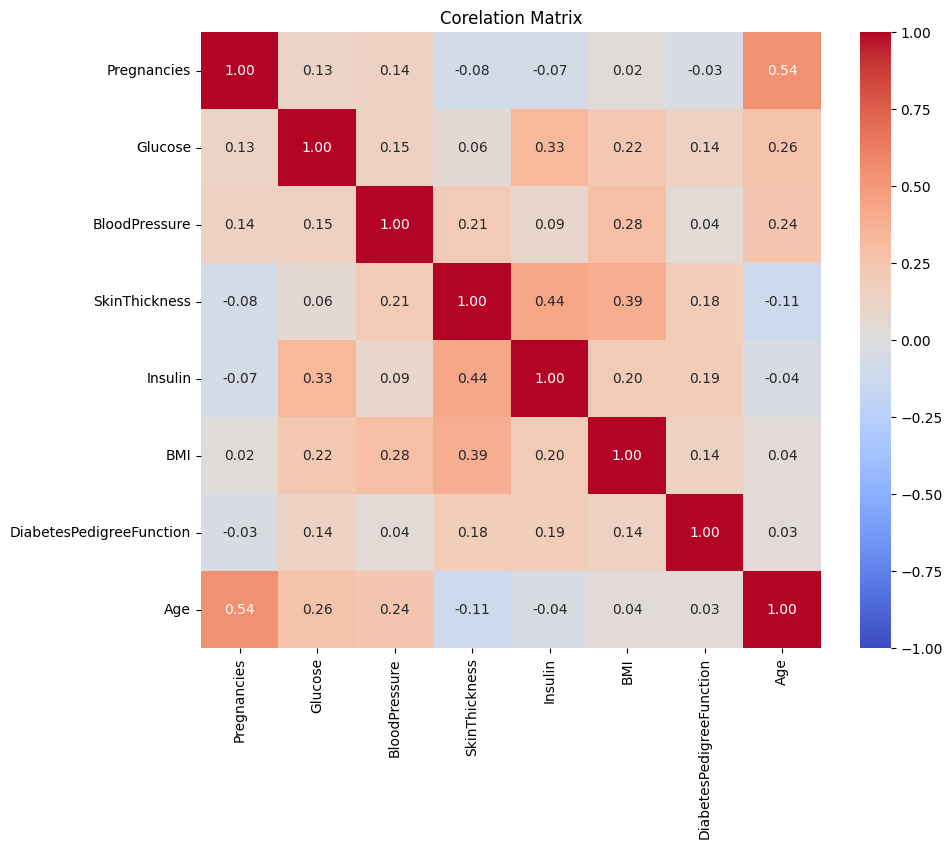

In [14]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)
plt.title("Corelation Matrix")
plt.show()

---
# Task 2: Feature Engineering
---

In [15]:
cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_zeros] = df[cols_with_zeros].replace(0, np.nan)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [16]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [17]:
df = df.apply(lambda x: x.fillna(x.mean()) if x.dtype != "O" else x, axis=0)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


In [18]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [19]:
bin_BMI=[0, 18.5, 24.9, 29.9, 34.9, float("inf")]
label_BMI= ["underweight", "normal", "overweight", "obese", "extremly_obese"] 
df["BMI_CAT"] = pd.cut(df["BMI"], bins= bin_BMI , labels=label_BMI)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_CAT
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1,obese
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0,overweight
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1,normal
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0,overweight
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1,extremly_obese


In [20]:
bin_glucose=[0, 140, 200, float("inf")]
label_glucose=["normal", "pre-diabetes", "diabetes"]
df["GLUCOSE_CAT"] = pd.cut(df["Glucose"], bins=bin_glucose, labels=label_glucose)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_CAT,GLUCOSE_CAT
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1,obese,pre-diabetes
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0,overweight,normal
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1,normal,pre-diabetes
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0,overweight,normal
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1,extremly_obese,normal


In [21]:
bin_insulin=[0, 16, 166, float("inf")]
label_insulin=["low", "normal", "high"]
df["INSULIN_CAT"] = pd.cut(df["Insulin"], bins=bin_insulin, labels=label_insulin)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_CAT,GLUCOSE_CAT,INSULIN_CAT
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1,obese,pre-diabetes,normal
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0,overweight,normal,normal
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1,normal,pre-diabetes,normal
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0,overweight,normal,normal
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1,extremly_obese,normal,high


In [22]:
df["HIGH_BLOOD_PRESSURE"] = df["BloodPressure"].apply(lambda x: "high" if x>80 else "normal")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_CAT,GLUCOSE_CAT,INSULIN_CAT,HIGH_BLOOD_PRESSURE
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1,obese,pre-diabetes,normal,normal
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0,overweight,normal,normal,normal
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1,normal,pre-diabetes,normal,normal
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0,overweight,normal,normal,normal
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1,extremly_obese,normal,high,normal


In [23]:
def label_encoder(df, binary_col):
    le= LabelEncoder()
    df[binary_col] = le.fit_transform(df[binary_col])
    return df
binary_cols = [col for col in df.columns if df[col].dtype not in [int, float] and df[col].nunique()==2]

for col in binary_cols:
    label_encoder(df, col)
    
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_CAT,GLUCOSE_CAT,INSULIN_CAT,HIGH_BLOOD_PRESSURE
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1,obese,1,normal,normal
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0,overweight,0,normal,normal
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1,normal,1,normal,normal
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0,overweight,0,normal,normal
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1,extremly_obese,0,high,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63,0,obese,0,high,normal
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27,0,extremly_obese,0,normal,normal
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0,overweight,0,normal,normal
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1,obese,0,normal,normal


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_CAT,GLUCOSE_CAT,INSULIN_CAT,HIGH_BLOOD_PRESSURE
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1,obese,1,normal,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0,overweight,0,normal,1
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1,normal,1,normal,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0,overweight,0,normal,1
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1,extremly_obese,0,high,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63,0,obese,0,high,1
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27,0,extremly_obese,0,normal,1
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0,overweight,0,normal,1
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1,obese,0,normal,1


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_CAT,GLUCOSE_CAT,INSULIN_CAT,HIGH_BLOOD_PRESSURE
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1,obese,1,normal,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0,overweight,0,normal,1
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1,normal,1,normal,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0,overweight,0,normal,1
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1,extremly_obese,0,high,1


In [24]:
def one_hot_encoder(df, cat_cols, drop_first=False):
    df = pd.get_dummies(df, columns=cat_cols, drop_first=drop_first)
    return df

ohe_cols = [col for col in df.columns if 10 >= df[col].nunique() > 2 ]

one_hot_encoder(df, ohe_cols)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,GLUCOSE_CAT,HIGH_BLOOD_PRESSURE,BMI_CAT_underweight,BMI_CAT_normal,BMI_CAT_overweight,BMI_CAT_obese,BMI_CAT_extremly_obese,INSULIN_CAT_low,INSULIN_CAT_normal,INSULIN_CAT_high
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1,1,1,False,False,False,True,False,False,True,False
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0,0,1,False,False,True,False,False,False,True,False
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1,1,1,False,True,False,False,False,False,True,False
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0,0,1,False,False,True,False,False,False,True,False
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1,0,1,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63,0,0,1,False,False,False,True,False,False,False,True
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27,0,0,1,False,False,False,False,True,False,True,False
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0,0,1,False,False,True,False,False,False,True,False
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1,0,1,False,False,False,True,False,False,True,False


In [25]:
num_cols
ss = StandardScaler()
df[num_cols] = ss.fit_transform(df[num_cols])
df.head()

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_CAT,GLUCOSE_CAT,INSULIN_CAT,HIGH_BLOOD_PRESSURE
0,0.639947,0.865108,-0.033518,6.655021e-01,-3.345079e-16,0.166292,0.468492,1.425995,1,obese,1,normal,1
1,-0.844885,-1.206162,-0.529859,-1.746338e-02,-3.345079e-16,-0.852531,-0.365061,-0.190672,0,overweight,0,normal,1
2,1.233880,2.015813,-0.695306,8.087936e-16,-3.345079e-16,-1.332833,0.604397,-0.105584,1,normal,1,normal,1
3,-0.844885,-1.074652,-0.529859,-7.004289e-01,-7.243887e-01,-0.634212,-0.920763,-1.041549,0,overweight,0,normal,1
4,-1.141852,0.503458,-2.680669,6.655021e-01,1.465506e-01,1.548980,5.484909,-0.020496,1,extremly_obese,0,high,1


In [26]:
y = df["Outcome"]
X = df
X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
acc_score = accuracy_score(y_test, y_pred)

print("Accuracy Score:", acc_score)

RandomForestClassifier()

Accuracy Score: 1.0
